In [2]:
import osmnx as ox
from pandana.loaders import osm
import momepy
import json
import requests
import pandas as pd
import json
import matplotlib
import geopandas as gpd
import networkx as nx
import osmnx as ox
import shapely
import momepy
from shapely.geometry import Point, LineString, Polygon
import numpy as np
import folium
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

### Define Isochrone

In [3]:
# Raffles Bay, Singapore
LATITUDE, LONGITUDE = 40.745231, -74.002234

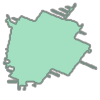

In [4]:
# Define your API credentials and parameters
API_KEY = "qPYXT9RvO_MJFkmRMuUz5TPFeD_0qmOz9bWB0PmazWk"

RANGE = 900  # Range in seconds (15 minutes)

# Build the API request URL
url = f'https://isoline.route.ls.hereapi.com/routing/7.2/calculateisoline.json' \
      f'?apiKey={API_KEY}' \
      f'&start=geo!{LATITUDE},{LONGITUDE}' \
      f'&range={RANGE}' \
      f'&rangetype=time' \
      f'&mode=shortest;pedestrian'

# Send the API request
response = requests.get(url)

# Extract the isochrone data from the response
data = response.json()

# Extract the coordinates of the isochrone polygon
polygon = data['response']['isoline'][0]['component'][0]['shape']
coordinates = [list(map(float, coord.split(','))) for coord in polygon]

interchanged_coordinates = [[lon, lat] for lat, lon in coordinates]
pol=Polygon(interchanged_coordinates)
pol

In [5]:
isochrones3 = gpd.GeoDataFrame(geometry=[pol])

In [134]:
isochrones = pd.concat([isochrones1, isochrones2, isochrones3], ignore_index=True)

In [135]:
isochrones['color'] = ['#9ecae1', '#4292c6', '#084594']

In [6]:
isochrones3.to_file(r'Downloads\nycIsochrones.json')

In [4]:
bbox1 = pol.bounds[1], pol.bounds[0], pol.bounds[3], pol.bounds[2]
polygon1 = shapely.geometry.box(*bbox1, ccw=True)


In [5]:
coordinates

[[51.502533, -0.1448393],
 [51.502533, -0.1438522],
 [51.5026188, -0.1435947],
 [51.5027905, -0.1435947],
 [51.5033054, -0.1441097],
 [51.5035629, -0.1441956],
 [51.5038204, -0.1441097],
 [51.5039063, -0.1438522],
 [51.5039063, -0.1435089],
 [51.5039921, -0.1432514],
 [51.5041637, -0.1432514],
 [51.5046787, -0.1437664],
 [51.5049362, -0.1438522],
 [51.5051937, -0.1437664],
 [51.5052795, -0.1435089],
 [51.5052795, -0.1431656],
 [51.5051937, -0.1429081],
 [51.505022, -0.1427364],
 [51.5049362, -0.1424789],
 [51.505022, -0.1422215],
 [51.5053654, -0.1418781],
 [51.5056229, -0.1417923],
 [51.5058804, -0.1418781],
 [51.5062237, -0.1422215],
 [51.5063095, -0.1424789],
 [51.5062237, -0.1427364],
 [51.506052, -0.1429081],
 [51.5058804, -0.1434231],
 [51.5057087, -0.1435947],
 [51.505537, -0.1441097],
 [51.5053654, -0.1442814],
 [51.5053654, -0.144453],
 [51.5056229, -0.1445389],
 [51.5058804, -0.144453],
 [51.5067387, -0.1435947],
 [51.5069103, -0.1435947],
 [51.507082, -0.1437664],
 [51.50725

### Get Parks

In [48]:
tags = {'leisure': 'park'}   

park = ox.geometries_from_point([LATITUDE, LONGITUDE], tags, dist=600)
park.reset_index(inplace=True)

# park['centroid'] = park['geometry'].to_crs('+proj=cea').centroid.to_crs(park.crs)

In [49]:
park

,element_type,osmid,wheelchair,geometry,nodes,ele,gnis:county_id,gnis:created,gnis:feature_id,gnis:state_id,...,man_made,min_height,old_railway_operator,opening_hours,phone,roof:material,roof:shape,smoking,tourism,type
0,way,22900913,NaN,"POLYGON ((-74.00197 40.74135, -74.00237 40.741...","[246537043, 246537045, 2702838473, 2702838487,...",6,061,10/02/2008,2500738,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,way,22900959,NaN,"POLYGON ((-73.99959 40.74916, -74.00209 40.750...","[246537590, 246537591, 246537592, 246537593, 2...",5,061,01/23/1980,946476,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,way,22903972,NaN,"POLYGON ((-74.00674 40.74949, -74.00715 40.748...","[246580120, 246650836, 2975276947, 2975276945,...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,way,22904239,NaN,"POLYGON ((-74.00849 40.74306, -74.00848 40.743...","[246581167, 2923070367, 9440836447, 2923070366...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,way,22961904,NaN,"POLYGON ((-74.00473 40.74665, -74.00455 40.746...","[2703014005, 247404277, 247404278, 2703013947,...",3,NaN,NaN,2083023,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,way,221922459,NaN,"POLYGON ((-74.00891 40.74860, -74.00895 40.748...","[1764544759, 246525563, 166892894, 246525578, ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,way,257671578,NaN,"POLYGON ((-73.99898 40.74788, -73.99880 40.747...","[2631535154, 6069788563, 6069788562, 606978857...",7,081,10/02/2008,NaN,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,way,371120098,NaN,"POLYGON ((-73.99616 40.74178, -73.99631 40.741...","[2703033339, 2703033306, 2703033304, 270303327...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,way,459838884,NaN,"POLYGON ((-74.00573 40.74399, -74.00506 40.743...","[2702857582, 4555734844, 2702857515, 270285753...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,relation,7141751,yes,"MULTIPOLYGON (((-74.00746 40.74315, -74.00740 ...","[[[2702832249, 2702832246, 5615790217, 5620252...",NaN,NaN,NaN,NaN,NaN,...,bridge,5;5.5,NYC,Mo-Su 07:00-19:00,+1 212-500-6035,grass,flat,no,attraction,multipolygon


<Axes: >

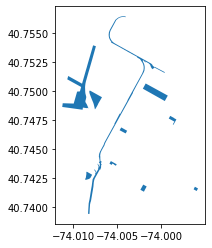

In [52]:
park.plot()

### Get Buildings

In [53]:
tags = {'building': True}   

built = ox.geometries_from_point([LATITUDE, LONGITUDE], tags, dist=600)

<Axes: >

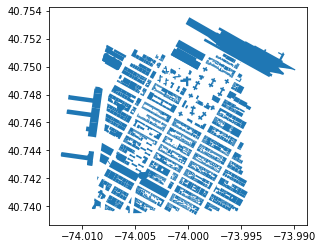

In [54]:
built.plot()

In [55]:
built

addr:city addr:housenumber addr:postcode addr:state  \
element_type osmid                                                           
node         368043670  New York              525         10011         NY   
             368053331       NaN              NaN           NaN         NY   
             368055721       NaN              NaN           NaN         NY   
way          221663796       NaN              NaN           NaN        NaN   
             250490286  New York               18         10014        NaN   
...                          ...              ...           ...        ...   
relation     3556683         NaN              351         10011        NaN   
             3556744         NaN              250         10011        NaN   
             3556872         NaN              NaN           NaN        NaN   
             3556896         NaN              NaN           NaN        NaN   
             3556991         NaN              NaN           NaN        NaN   

                             addr:street building building:colour  \
element_type osmid                                                  
node         368043670  West 21st Street      yes         #C6BD9E   
             368053331               NaN      yes             NaN   
             368055721               NaN      yes             NaN   
way          221663796               NaN      yes             NaN   
             250490286        9th Avenue      yes             NaN   
...                                  ...      ...             ...   
relation     3556683    West 18th Street   school             NaN   
             3556744    West 16th Street      yes             NaN   
             3556872                 NaN      yes             NaN   
             3556896                 NaN      yes             NaN   
             3556991                 NaN      yes         #D1CAC4   

                       building:levels building:material  ele  ...  \
element_type osmid                                             ...   
node         368043670               2             brick    2  ...   
             368053331             NaN               NaN    5  ...   
             368055721             NaN               NaN    5  ...   
way          221663796             NaN               NaN  NaN  ...   
             250490286             NaN               NaN  NaN  ...   
...                                ...               ...  ...  ...   
relation     3556683               NaN               NaN    5  ...   
             3556744               NaN               NaN  NaN  ...   
             3556872               NaN               NaN  NaN  ...   
             3556896               NaN               NaN  NaN  ...   
             3556991                 4               NaN  NaN  ...   

                       payment:visa swimming_pool fixme  fee parking note  \
element_type osmid                                                          
node         368043670          NaN           NaN   NaN  NaN     NaN  NaN   
             368053331          NaN           NaN   NaN  NaN     NaN  NaN   
             368055721          NaN           NaN   NaN  NaN     NaN  NaN   
way          221663796          NaN           NaN   NaN  NaN     NaN  NaN   
             250490286          NaN           NaN   NaN  NaN     NaN  NaN   
...                             ...           ...   ...  ...     ...  ...   
relation     3556683            NaN           NaN   NaN  NaN     NaN  NaN   
             3556744            NaN           NaN   NaN  NaN     NaN  NaN   
             3556872            NaN           NaN   NaN  NaN     NaN  NaN   
             3556896            NaN           NaN   NaN  NaN     NaN  NaN   
             3556991            NaN           NaN   NaN  NaN     NaN  NaN   

                       healthcare healthcare:speciality  \
element_type osmid                                        
node         368043670        NaN                   NaN   
             3680533

<Axes: >

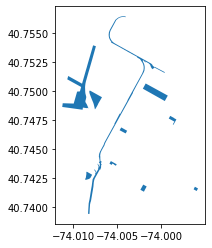

In [56]:
park.plot()

### Get Footprints

In [85]:
def getSites(pol, range): 
    lat1, lon1, lat2, lon2 = pol.bounds[1], pol.bounds[0], pol.bounds[3], pol.bounds[2]

    overpass_url = "https://lz4.overpass-api.de/api/interpreter"
    query = f"""
    [out:json][timeout:25];
    (nwr["amenity"="hospital"]({lat1},{lon1},{lat2},{lon2})->.park;);
    nwr["building"]({lat1},{lon1},{lat2},{lon2})(around.park:{range});
    out body;
    >;
    out skel qt;
    """
    response = requests.get(overpass_url, params={"data": query})
    data = response.json()
    
    elements = data.get("elements", [])
    skipped_polygons = 0

    for element in elements:
        try:
            element_type = element.get("type")
            lat = None
            lon = None
            tags = element.get("tags", {})

            if element_type == 'node' and 'tags' in element:
                tags = element['tags']
                if 'building' in tags and tags['building'] == 'yes':
                    pass  # Do nothing if the node has 'building' tag with value 'yes'
                else:
                    lat = element['lat']
                    lon = element['lon']

                    point = Point(lon, lat)
                    element["geometry"] = {
                        "type": "Point",
                        "coordinates": [lon, lat]
                    }

            elif element_type == "way":
                nodes = element.get("nodes", [])
                if nodes:
                    # Draw a line for each way
                    coordinates = []
                    for node_id in nodes:
                        node = next((n for n in elements if n["type"] == "node" and n["id"] == node_id), None)
                        if node:
                            lat = node.get("lat")
                            lon = node.get("lon")
                            coordinates.append([lat, lon])
                    if coordinates:
                        line = Polygon(coordinates)
                        element["geometry"] = {
                            "type": "Polygon",
                            "coordinates": [list(coord) for coord in line.exterior.coords]
                        }
        except Exception as e:
            skipped_polygons += 1
            continue
        
    landuse_values = []
    name_values = []
    description_values = []
    type_values = []
    geometry_values = []

    # Extract column values from JSON data
    for feature in elements:
        if 'tags' in feature and feature['tags']:
            name = feature['tags'].get('name', None)
            name_values.append(name)

            description = feature['tags'].get('description', None)
            description_values.append(description)

            name = None
            name_values.append(name)

            description = None
            description_values.append(description)


        feature_type = feature['type']
        type_values.append(feature_type)

        if 'geometry' in feature:
            geometry_type = feature['geometry'].get('type', None)
            coordinates = feature['geometry'].get('coordinates', None)

            if geometry_type == 'Polygon' and coordinates and len(coordinates) > 1:
                line = Polygon(coordinates)
                geometry_values.append(line)
            elif geometry_type == 'Point' and coordinates:
                point = Point(coordinates[1], coordinates[0])
                geometry_values.append(point)
            else:
                geometry_values.append(None)
        else:
            geometry_values.append(None)

    # Create GeoDataFrame
    data = {
        'type': type_values,
        'geometry': geometry_values
    }
    gdf = gpd.GeoDataFrame(data)

#     # # Print the GeoDataFrame
#     # print()
    gd = gdf[gdf['type'] != 'node']
    gd['range'] = range
    return gd

### Get Building Proximity to Parks

In [86]:
dist = [50, 100, 250, 500]
result_dataframes = []

for item in dist:
    df = getSites(pol, item)
    result_dataframes.append(df)

# Concatenate the dataframes
final_dataframe = pd.concat(result_dataframes, ignore_index=True)

min_range_indices = final_dataframe.groupby('geometry')['range'].idxmin()

# Select the rows with minimum 'range' for each group
result_df = final_dataframe.loc[min_range_indices]

# Reset the index
result_df = result_df.reset_index(drop=True)

result_dframe = result_df.dropna()

C:\Users\Asus\anaconda3\envs\tf_gpu\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Asus\anaconda3\envs\tf_gpu\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Asus\anaconda3\envs\tf_gpu\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

### Plot Buildings + Parks

In [87]:
def map_value_to_color(value):
    if value == 500:
        return "#fee5d9"
    elif value == 250:
        return "#fcae91"
    elif value == 100:
        return "#fb6a4a"
    elif value == 50:
        return "#de2d26"

# Apply the function to create the color column
result_df["color"] = result_df["range"].apply(map_value_to_color)

In [88]:
result_df

,type,geometry,range,color
0,way,"POLYGON ((40.73594 -74.00630, 40.73597 -74.006...",500,#fee5d9
1,way,"POLYGON ((40.73593 -74.00635, 40.73607 -74.006...",500,#fee5d9
2,way,"POLYGON ((40.73563 -74.00565, 40.73558 -74.005...",500,#fee5d9
3,way,"POLYGON ((40.73563 -74.00567, 40.73565 -74.005...",500,#fee5d9
4,way,"POLYGON ((40.73573 -74.00525, 40.73571 -74.005...",500,#fee5d9
...,...,...,...,...
1329,way,"POLYGON ((40.74117 -74.00417, 40.74119 -74.004...",500,#fee5d9
1330,way,"POLYGON ((40.74120 -74.00435, 40.74127 -74.004...",500,#fee5d9
1331,way,"POLYGON ((40.74124 -74.00453, 40.74137 -74.004...",500,#fee5d9
1332,way,"POLYGON ((40.74120 -74.00456, 40.74133 -74.004...",500,#fee5d9


In [89]:
m = folium.Map(location=[LATITUDE, LONGITUDE], zoom_start=13, tiles="cartodbdark_matter")

# Add a pin marker to the map
folium.Marker(location=[LATITUDE, LONGITUDE], popup=f'{LATITUDE},{LONGITUDE}').add_to(m)

# Extract the coordinates of the isochrone polygon

# Add the isochrone polygon to the map
# folium.Polygon(locations=coordinates, fill=True, fill_color='blue').add_to(m)

for index, row in result_df.iterrows():
    coordinat = list(row.geometry.exterior.coords)
    range_value = row['color']

    # Map the range value to a color from the colormap
    
    folium.Polygon(locations=coordinat, fill=range_value, color=range_value,fill_opacity=0.7).add_to(m)

for index, row in park.iterrows():
    geometry = row.geometry

    if geometry.geom_type == 'Polygon':
        coordinates = list(geometry.exterior.coords)
        interchanged_coordinates = [[lon, lat] for lat, lon in coordinates]

        folium.Polygon(locations=interchanged_coordinates, fill=True, fill_color='#013220', color='#013220', fill_opacity=0.9).add_to(m)
    elif geometry.geom_type == 'MultiPolygon':
        for polygon in geometry.geoms:
            coordinates = list(polygon.exterior.coords)
            interchanged_coordinates = [[lon, lat] for lat, lon in coordinates]

            folium.Polygon(locations=interchanged_coordinates, fill=True, fill_color='#013220', color='#013220', fill_opacity=0.9).add_to(m)

# Display the map
m


In [90]:
result_df

,type,geometry,range,color
0,way,"POLYGON ((40.73594 -74.00630, 40.73597 -74.006...",500,#fee5d9
1,way,"POLYGON ((40.73593 -74.00635, 40.73607 -74.006...",500,#fee5d9
2,way,"POLYGON ((40.73563 -74.00565, 40.73558 -74.005...",500,#fee5d9
3,way,"POLYGON ((40.73563 -74.00567, 40.73565 -74.005...",500,#fee5d9
4,way,"POLYGON ((40.73573 -74.00525, 40.73571 -74.005...",500,#fee5d9
...,...,...,...,...
1329,way,"POLYGON ((40.74117 -74.00417, 40.74119 -74.004...",500,#fee5d9
1330,way,"POLYGON ((40.74120 -74.00435, 40.74127 -74.004...",500,#fee5d9
1331,way,"POLYGON ((40.74124 -74.00453, 40.74137 -74.004...",500,#fee5d9
1332,way,"POLYGON ((40.74120 -74.00456, 40.74133 -74.004...",500,#fee5d9


In [91]:
result_df.to_file(r'Downloads\buildings2mall_nyc.json')

In [92]:
park

,element_type,osmid,wheelchair,geometry,nodes,ele,gnis:county_id,gnis:created,gnis:feature_id,gnis:state_id,...,man_made,min_height,old_railway_operator,opening_hours,phone,roof:material,roof:shape,smoking,tourism,type
0,way,22900913,NaN,"POLYGON ((-74.00197 40.74135, -74.00237 40.741...","[246537043, 246537045, 2702838473, 2702838487,...",6,061,10/02/2008,2500738,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,way,22900959,NaN,"POLYGON ((-73.99959 40.74916, -74.00209 40.750...","[246537590, 246537591, 246537592, 246537593, 2...",5,061,01/23/1980,946476,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,way,22903972,NaN,"POLYGON ((-74.00674 40.74949, -74.00715 40.748...","[246580120, 246650836, 2975276947, 2975276945,...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,way,22904239,NaN,"POLYGON ((-74.00849 40.74306, -74.00848 40.743...","[246581167, 2923070367, 9440836447, 2923070366...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,way,22961904,NaN,"POLYGON ((-74.00473 40.74665, -74.00455 40.746...","[2703014005, 247404277, 247404278, 2703013947,...",3,NaN,NaN,2083023,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,way,221922459,NaN,"POLYGON ((-74.00891 40.74860, -74.00895 40.748...","[1764544759, 246525563, 166892894, 246525578, ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,way,257671578,NaN,"POLYGON ((-73.99898 40.74788, -73.99880 40.747...","[2631535154, 6069788563, 6069788562, 606978857...",7,081,10/02/2008,NaN,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,way,371120098,NaN,"POLYGON ((-73.99616 40.74178, -73.99631 40.741...","[2703033339, 2703033306, 2703033304, 270303327...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,way,459838884,NaN,"POLYGON ((-74.00573 40.74399, -74.00506 40.743...","[2702857582, 4555734844, 2702857515, 270285753...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,relation,7141751,yes,"MULTIPOLYGON (((-74.00746 40.74315, -74.00740 ...","[[[2702832249, 2702832246, 5615790217, 5620252...",NaN,NaN,NaN,NaN,NaN,...,bridge,5;5.5,NYC,Mo-Su 07:00-19:00,+1 212-500-6035,grass,flat,no,attraction,multipolygon


In [93]:
park = park[park["element_type"]=="way"]

In [120]:
park["name"][8] = "Government Center"

C:\Users\Asus\AppData\Local\Temp\ipykernel_14964\3715014778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  park["name"][8] = "Government Center"


In [94]:
parks = park[["geometry", "name"]]

In [95]:
parks

,geometry,name
0,"POLYGON ((-74.00197 40.74135, -74.00237 40.741...",Dr. Gertrude B. Kelly Playground
1,"POLYGON ((-73.99959 40.74916, -74.00209 40.750...",Chelsea Park
2,"POLYGON ((-74.00674 40.74949, -74.00715 40.748...",Chelsea Waterside Park
3,"POLYGON ((-74.00849 40.74306, -74.00848 40.743...",14th Street Park
4,"POLYGON ((-74.00473 40.74665, -74.00455 40.746...",Clement Clarke Moore Park
5,"POLYGON ((-74.00891 40.74860, -74.00895 40.748...",Chelsea Waterside Park
6,"POLYGON ((-73.99898 40.74788, -73.99880 40.747...",Penn South Playground
7,"POLYGON ((-73.99616 40.74178, -73.99631 40.741...",Chelsea Green
8,"POLYGON ((-74.00573 40.74399, -74.00506 40.743...",Secret Garden Park


In [96]:
parks.to_file(r'Downloads\nyc_park.json')

In [194]:
result_df

,type,geometry,range,color
0,way,"POLYGON ((51.50606 -0.13533, 51.50593 -0.13570...",500,#f2f0f7
1,way,"POLYGON ((51.50606 -0.13533, 51.50636 -0.13448...",500,#f2f0f7
2,way,"POLYGON ((51.50628 -0.13531, 51.50628 -0.13528...",500,#f2f0f7
3,way,"POLYGON ((51.50605 -0.13597, 51.50608 -0.13590...",500,#f2f0f7
4,way,"POLYGON ((51.50608 -0.13590, 51.50611 -0.13581...",500,#f2f0f7
...,...,...,...,...
2463,way,"POLYGON ((51.51431 -0.13883, 51.51431 -0.13884...",500,#f2f0f7
2464,way,"POLYGON ((51.51468 -0.13907, 51.51450 -0.13894...",500,#f2f0f7
2465,way,"POLYGON ((51.51487 -0.13855, 51.51481 -0.13874...",500,#f2f0f7
2466,way,"POLYGON ((51.51468 -0.13803, 51.51480 -0.13812...",500,#f2f0f7


In [12]:
result_df

,type,geometry,range,color
0,way,"POLYGON ((51.50662 -0.14035, 51.50663 -0.14033...",500,#fa9fb5
1,way,"POLYGON ((51.50725 -0.14095, 51.50716 -0.14086...",500,#fa9fb5
2,way,"POLYGON ((51.50699 -0.14215, 51.50701 -0.14209...",500,#fa9fb5
3,way,"POLYGON ((51.50784 -0.14147, 51.50790 -0.14130...",500,#fa9fb5
4,way,"POLYGON ((51.50779 -0.14142, 51.50774 -0.14138...",500,#fa9fb5
...,...,...,...,...
3304,way,"POLYGON ((51.51580 -0.13454, 51.51576 -0.13474...",500,#fa9fb5
3305,way,"POLYGON ((51.51557 -0.13463, 51.51571 -0.13471...",500,#fa9fb5
3306,way,"POLYGON ((51.51593 -0.13494, 51.51571 -0.13489...",500,#fa9fb5
3307,way,"POLYGON ((51.51580 -0.13454, 51.51595 -0.13462...",500,#fa9fb5


In [209]:
park

,element_type,osmid,name,organic,shop,wheelchair,geometry,addr:city,addr:housenumber,addr:postcode,...,building:colour,building:levels,roof:colour,branch,name:zh,name:zh_pinyin,image,level,centroid,color
0,node,2536763015,Neal's Yard Dairy,only,supermarket,no,POINT (-0.12624 51.51424),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.12624 51.51424),#54278f
1,node,3041707059,Whole Foods Market,NaN,supermarket,yes,POINT (-0.13609 51.51053),London,20,W1B 5AR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.13609 51.51053),#54278f
2,node,4365108690,Rice Wine Shop,NaN,supermarket,limited,POINT (-0.13708 51.51077),London,82,W1F 9UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.13708 51.51077),#54278f
3,node,4878468498,Young Cheng Fresh Seafood Shop,NaN,supermarket,NaN,POINT (-0.13186 51.51174),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.13186 51.51174),#54278f
4,node,5324642162,Jumbo,NaN,supermarket,NaN,POINT (-0.12431 51.50785),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.12431 51.50785),#54278f
5,node,5486109122,Japan Centre,NaN,supermarket,yes,POINT (-0.13137 51.50973),London,35b,SW1Y 4EA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.13137 51.50973),#54278f
6,way,993318704,New Loon Moon Supermarket,NaN,supermarket,NaN,"POLYGON ((-0.13060 51.51202, -0.13065 51.51200...",NaN,NaN,NaN,...,white,3,grey,NaN,NaN,NaN,NaN,NaN,POINT (-0.13072 51.51204),#54278f
7,way,993439439,Loon Fung Supermarket,NaN,supermarket,NaN,"POLYGON ((-0.13048 51.51195, -0.13033 51.51179...",London,42-44,W1D 5QG,...,NaN,NaN,NaN,Chinatown,龍鳳行,Lóngfèngháng,NaN,NaN,POINT (-0.13033 51.51190),#54278f
8,way,995869087,SeeWoo,NaN,supermarket,no,"POLYGON ((-0.13032 51.51162, -0.13037 51.51161...",NaN,18-20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://archive.org/details/west-end-2019-05-2...,0,POINT (-0.13047 51.51166),#54278f


In [30]:
park["color"] = '#A7DD88'

In [31]:
park

,element_type,osmid,nodes,leisure,geometry,barrier,landuse,access,name,color
0,way,5109881,"[35019372, 4230539173, 35019373, 35019374, 350...",park,"POLYGON ((18.42236 -33.91559, 18.42246 -33.915...",NaN,NaN,NaN,NaN,#A7DD88
1,way,5109883,"[35019839, 35019840, 35019841, 35019842, 35019...",park,"POLYGON ((18.42207 -33.91580, 18.42186 -33.915...",NaN,NaN,NaN,NaN,#A7DD88
2,way,5111613,"[35125449, 4234777195, 4234777200, 4234777215,...",park,"POLYGON ((18.43048 -33.91878, 18.43055 -33.918...",fence,NaN,NaN,NaN,#A7DD88
3,way,424212320,"[4236725792, 4236725790, 4236725789, 4236725792]",park,"POLYGON ((18.42504 -33.92000, 18.42485 -33.919...",NaN,village_green,NaN,NaN,#A7DD88
4,way,424289174,"[4237367821, 4237368096, 4237367814, 423736778...",park,"POLYGON ((18.43135 -33.92287, 18.43147 -33.922...",NaN,NaN,NaN,NaN,#A7DD88
5,way,424725914,"[4240941878, 4240941874, 4240941873, 424094187...",park,"POLYGON ((18.43257 -33.92381, 18.43242 -33.923...",fence,NaN,no,NaN,#A7DD88
6,way,771378868,"[7201123400, 7201123401, 7201123402, 720112340...",park,"POLYGON ((18.42155 -33.91356, 18.42135 -33.913...",NaN,NaN,NaN,The V&A Battery Park,#A7DD88


In [44]:
park.name[11] = "St James's Park"

C:\Users\Asus\AppData\Local\Temp\ipykernel_19328\1388815145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  park.name[11] = "St James's Park"


In [45]:
park

,element_type,osmid,geometry,foot,opening_hours,nodes,leisure,name,tourism,wikidata,...,name:en,name:ru,name:zh,operator:wikidata,ref:GB:nhle,surface,ways,type,centroid,color
0,way,4082589,"POLYGON ((-0.12971 51.51067, -0.12971 51.51047...",NaN,NaN,"[21665708, 1835298245, 21665707, 1835298143, 4...",park,Leicester Square,attraction,Q848912,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.13009 51.51042),#A7DD88
1,way,4253932,"POLYGON ((-0.11955 51.51080, -0.11932 51.51053...",NaN,NaN,"[25474671, 25474673, 9605118159, 4739496999, 2...",park,Kings chapel of the Savoy,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.11959 51.51064),#A7DD88
2,way,4254099,"POLYGON ((-0.12200 51.50745, -0.12186 51.50741...",NaN,NaN,"[25474910, 1645919438, 25474921, 25474925, 254...",park,Victoria Embankment Gardens,NaN,Q7926695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.12149 51.50847),#A7DD88
3,way,4256229,"POLYGON ((-0.13764 51.51171, -0.13709 51.51193...",NaN,NaN,"[25502320, 25502321, 25502322, 25502324, 25502...",park,Golden Square,NaN,Q5579811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.13719 51.51165),#A7DD88
4,way,4256950,"POLYGON ((-0.12272 51.50630, -0.12272 51.50634...",NaN,NaN,"[25507013, 4709924032, 1602135995, 4709924033,...",park,Whitehall Garden,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.12335 51.50563),#A7DD88
5,way,4256953,"POLYGON ((-0.12337 51.50461, -0.12377 51.50319...",NaN,NaN,"[25507030, 25507031, 25507032, 25507029, 25507...",park,Whitehall Garden,NaN,Q18901051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.12393 51.50395),#A7DD88
6,way,4358458,"POLYGON ((-0.13557 51.50671, -0.13565 51.50681...",NaN,Mo-Fr 10:00-16:30,"[3933844373, 1422007088, 4169545271, 26559656,...",park,St James's Square Gardens,NaN,Q500529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.13526 51.50717),#A7DD88
7,way,4373996,"POLYGON ((-0.11901 51.50342, -0.11919 51.50344...",NaN,24/7,"[1166455182, 1166455184, 2208941031, 220894113...",park,Jubilee Gardens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.11818 51.50392),#A7DD88
8,way,38446817,"POLYGON ((-0.13359 51.50626, -0.13330 51.50593...",NaN,NaN,"[454540480, 454540481, 454540482, 454540483, 4...",park,Waterloo Gardens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.13287 51.50630),#A7DD88
9,way,38447032,"POLYGON ((-0.13160 51.50652, -0.13097 51.50674...",NaN,NaN,"[454545007, 454545010, 454545014, 454545017, 4...",park,Carlton Gardens,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.13144 51.50679),#A7DD88


In [40]:
parks = park[['geometry','element_type', 'color']]

In [46]:
parks

,geometry,element_type,color
0,"POLYGON ((18.42236 -33.91559, 18.42246 -33.915...",way,#A7DD88
1,"POLYGON ((18.42207 -33.91580, 18.42186 -33.915...",way,#A7DD88
2,"POLYGON ((18.43048 -33.91878, 18.43055 -33.918...",way,#A7DD88
3,"POLYGON ((18.42504 -33.92000, 18.42485 -33.919...",way,#A7DD88
4,"POLYGON ((18.43135 -33.92287, 18.43147 -33.922...",way,#A7DD88
5,"POLYGON ((18.43257 -33.92381, 18.43242 -33.923...",way,#A7DD88
6,"POLYGON ((18.42155 -33.91356, 18.42135 -33.913...",way,#A7DD88


In [48]:
parks['geometry'] = [Point(xy) for xy in zip(parks.centroid.x, parks.centroid.y)]

C:\Users\Asus\anaconda3\envs\tf_gpu\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

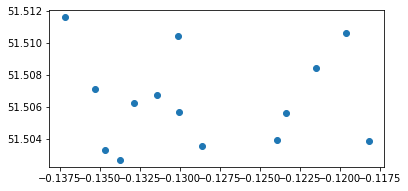

In [49]:
parks.plot()

In [50]:
parks = parks[['element_type', 'geometry', 'color', 'name']]

In [29]:
result_df = result_df.dropna()


In [32]:
result_df

,type,geometry,range,color
0,way,"POLYGON ((51.50662 -0.14035, 51.50663 -0.14033...",500,#fa9fb5
1,way,"POLYGON ((51.50725 -0.14095, 51.50716 -0.14086...",500,#fa9fb5
2,way,"POLYGON ((51.50699 -0.14215, 51.50701 -0.14209...",500,#fa9fb5
3,way,"POLYGON ((51.50784 -0.14147, 51.50790 -0.14130...",500,#fa9fb5
4,way,"POLYGON ((51.50779 -0.14142, 51.50774 -0.14138...",500,#fa9fb5
...,...,...,...,...
3304,way,"POLYGON ((51.51580 -0.13454, 51.51576 -0.13474...",500,#fa9fb5
3305,way,"POLYGON ((51.51557 -0.13463, 51.51571 -0.13471...",500,#fa9fb5
3306,way,"POLYGON ((51.51593 -0.13494, 51.51571 -0.13489...",500,#fa9fb5
3307,way,"POLYGON ((51.51580 -0.13454, 51.51595 -0.13462...",500,#fa9fb5


In [53]:
path = r'C:\Users\Asus\OneDrive\Documents\GitHub\mapbox-gl\data\park_names.json'

In [43]:
parks.to_json(r'Downloads\CTpark_names.json')

ValueError: Unknown na method Downloads\CTpark_names.json

In [35]:
parks

,element_type,color,name
0,way,#A7DD88,NaN
1,way,#A7DD88,NaN
2,way,#A7DD88,NaN
3,way,#A7DD88,NaN
4,way,#A7DD88,NaN
5,way,#A7DD88,NaN
6,way,#A7DD88,The V&A Battery Park


In [54]:
with open(path, 'w') as f:
        f.write(parks.to_json())

In [34]:
park

,element_type,osmid,geometry,foot,opening_hours,name,nodes,leisure,tourism,wikidata,...,name:ru,name:zh,operator:wikidata,ref:GB:nhle,surface,alt_name,ways,type,centroid,color
0,way,4082589,"POLYGON ((-0.12971 51.51067, -0.12971 51.51047...",NaN,NaN,Leicester Square,"[21665708, 1835298245, 21665707, 1835298143, 4...",park,attraction,Q848912,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.13009 51.51042),#006d2c
1,way,4253932,"POLYGON ((-0.11955 51.51080, -0.11932 51.51053...",NaN,NaN,Kings chapel of the Savoy,"[25474671, 25474673, 9605118159, 4739496999, 2...",park,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.11959 51.51064),#006d2c
2,way,4254099,"POLYGON ((-0.12200 51.50745, -0.12186 51.50741...",NaN,NaN,Victoria Embankment Gardens,"[25474910, 1645919438, 25474921, 25474925, 254...",park,NaN,Q7926695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.12149 51.50847),#006d2c
3,way,4256229,"POLYGON ((-0.13764 51.51171, -0.13709 51.51193...",NaN,NaN,Golden Square,"[25502320, 25502321, 25502322, 25502324, 25502...",park,NaN,Q5579811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.13719 51.51165),#006d2c
4,way,4256950,"POLYGON ((-0.12272 51.50630, -0.12272 51.50634...",NaN,NaN,Whitehall Garden,"[25507013, 4709924032, 1602135995, 4709924033,...",park,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.12335 51.50563),#006d2c
5,way,4256953,"POLYGON ((-0.12337 51.50461, -0.12377 51.50319...",NaN,NaN,Whitehall Garden,"[25507030, 25507031, 25507032, 25507029, 25507...",park,NaN,Q18901051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.12393 51.50395),#006d2c
6,way,4358458,"POLYGON ((-0.13557 51.50671, -0.13565 51.50681...",NaN,Mo-Fr 10:00-16:30,St James's Square Gardens,"[3933844373, 1422007088, 4169545271, 26559656,...",park,NaN,Q500529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.13526 51.50717),#006d2c
7,way,4373996,"POLYGON ((-0.11901 51.50342, -0.11919 51.50344...",NaN,24/7,Jubilee Gardens,"[1166455182, 1166455184, 2208941031, 220894113...",park,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.11818 51.50392),#006d2c
8,way,38446817,"POLYGON ((-0.13359 51.50626, -0.13330 51.50593...",NaN,NaN,NaN,"[454540480, 454540481, 454540482, 454540483, 4...",park,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.13287 51.50630),#006d2c
9,way,38447032,"POLYGON ((-0.13160 51.50652, -0.13097 51.50674...",NaN,NaN,NaN,"[454545007, 454545010, 454545014, 454545017, 4...",park,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-0.13144 51.50679),#006d2c


## Threats (Flood Risk)

In [18]:
url = "http://app-v-publi-i5rl7uicrv10-626950587.ap-southeast-1.elb.amazonaws.com/v3/sea"

# Payload JSON query
payload = {
    "roi_data": {
        "type": "FeatureCollection",
        "features": [
            {
                "type": "Feature",
                "properties": {},
                "geometry": {
                    "coordinates": [
                        interchanged_coordinates
                    ],
                    "type": "Polygon"
                }
            }
        ]
    },
    "min_gl": 0,
    "mm": 1200,
    "year": 2025
}

# Make the POST request
response = requests.post(url, json=payload)
data=response.json()
features = data['drown_data']['features']

geometry_values = []
classVal = []
count=[]
drownArea=[]


for feature in features:
    classVal.append(feature['properties']['class'])
    count.append(feature['properties']['count'])
    drownArea.append(feature['properties']['drown_area'])
    
    line = Polygon(feature['geometry']['coordinates'][0])
    geometry_values.append(line)
    
data = {
        'class': classVal,
    'count': count,
        'drownArea': drownArea,
        'geometry': geometry_values
    }
gdf2 = gpd.GeoDataFrame(data)

<Axes: >

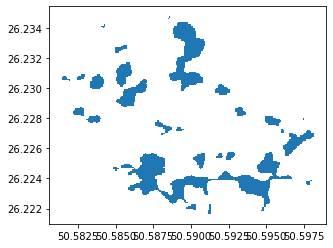

In [23]:
gdf2.plot()

In [54]:
def floods(latitude, longitude): 
    API_KEY = "qPYXT9RvO_MJFkmRMuUz5TPFeD_0qmOz9bWB0PmazWk"

    RANGE = 1200  # Range in seconds (15 minutes)

    # Build the API request URL
    url = f'https://isoline.route.ls.hereapi.com/routing/7.2/calculateisoline.json' \
          f'?apiKey={API_KEY}' \
          f'&start=geo!{LATITUDE},{LONGITUDE}' \
          f'&range={RANGE}' \
          f'&rangetype=time' \
          f'&mode=shortest;pedestrian'

    # Send the API request
    response = requests.get(url)

    # Extract the isochrone data from the response
    data = response.json()

    # Extract the coordinates of the isochrone polygon
    polygon = data['response']['isoline'][0]['component'][0]['shape']
    coordinates = [list(map(float, coord.split(','))) for coord in polygon]

    interchanged_coordinates = [[lon, lat] for lat, lon in coordinates]

    url = "http://app-v-publi-i5rl7uicrv10-626950587.ap-southeast-1.elb.amazonaws.com/v3/sea"

    # Payload JSON query
    payload = {
        "roi_data": {
            "type": "FeatureCollection",
            "features": [
                {
                    "type": "Feature",
                    "properties": {},
                    "geometry": {
                        "coordinates": [
                            interchanged_coordinates
                        ],
                        "type": "Polygon"
                    }
                }
            ]
        },
        "min_gl": 0,
        "mm": 1000,
        "year": 2040
    }

    # Make the POST request
    response = requests.post(url, json=payload)
    data=response.json()
    features = data['drown_data']['features']

    geometry_values = []
    classVal = []
    count=[]
    drownArea=[]


    for feature in features:
        classVal.append(feature['properties']['class'])
        count.append(feature['properties']['count'])
        drownArea.append(feature['properties']['drown_area'])

        line = Polygon(feature['geometry']['coordinates'][0])
        geometry_values.append(line)

    data = {
            'class': classVal,
        'count': count,
            'drownArea': drownArea,
            'geometry': geometry_values
        }
    gdf2 = gpd.GeoDataFrame(data)
    
    m = folium.Map(location=[51.49799,-0.13088], zoom_start=13, tiles="cartodbdark_matter")


    # Extract the coordinates of the isochrone polygon

    # Add the isochrone polygon to the map
    # folium.Polygon(locations=coordinates, fill=True, fill_color='blue').add_to(m)

    for index, row in gdf2.iterrows():
        geometry = row.geometry

        if geometry.geom_type == 'Polygon':
            coordinates = list(geometry.exterior.coords)

            folium.Polygon(locations=interchanged_coordinates, fill=True, fill_color='#006d2c', color='#006d2c', fill_opacity=0.9).add_to(m)
        elif geometry.geom_type == 'MultiPolygon':
            for polygon in geometry.geoms:
                coordinates = list(polygon.exterior.coords)

                folium.Polygon(locations=coordinates, fill=True, fill_color='#006d2c', color='#006d2c', fill_opacity=0.9).add_to(m)

    return m

In [55]:
data = {
        'class': classVal,
    'count': count,
        'drownArea': drownArea,
        'geometry': geometry_values
    }
gdf2 = gpd.GeoDataFrame(data)

In [56]:
gdf2

,class,count,drownArea,geometry
0,1,4,400,"POLYGON ((151.22033 -33.87448, 151.22033 -33.8..."
1,1,42,4200,"POLYGON ((151.22078 -33.87439, 151.22078 -33.8..."
2,1,2847,284700,"POLYGON ((151.22464 -33.86469, 151.22464 -33.8..."
3,1,4,400,"POLYGON ((151.22500 -33.87655, 151.22500 -33.8..."
4,1,1,100,"POLYGON ((151.22518 -33.86703, 151.22527 -33.8..."
5,1,1,100,"POLYGON ((151.22527 -33.86712, 151.22536 -33.8..."
6,1,3,300,"POLYGON ((151.22536 -33.86712, 151.22536 -33.8..."
7,1,38,3800,"POLYGON ((151.22554 -33.87682, 151.22554 -33.8..."
8,1,3883,388300,"POLYGON ((151.22671 -33.86810, 151.22671 -33.8..."
9,1,67,6700,"POLYGON ((151.22572 -33.87655, 151.22572 -33.8..."


In [57]:
# def custom_buffer(polygon):
#     return polygon.buffer(0.0001)

# # Apply the custom_buffer function to all polygons in the GeoDataFrame
# gdf2['geometry'] = gdf2['geometry'].apply(custom_buffer)

<Axes: >

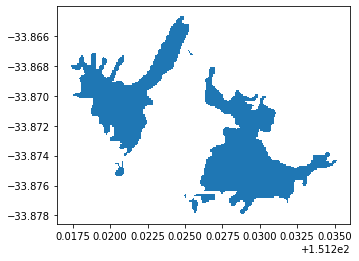

In [58]:
gdf2.plot()

In [66]:
# gdf2.to_file(r'Downloads\rioFlood_1200.json')

In [67]:
m = folium.Map(location=[51.49799,-0.13088], zoom_start=13, tiles="cartodbdark_matter")


# Extract the coordinates of the isochrone polygon

# Add the isochrone polygon to the map
# folium.Polygon(locations=coordinates, fill=True, fill_color='blue').add_to(m)

for index, row in results.iterrows():
    geometry = row.geometry

    if geometry.geom_type == 'Polygon':
        coordinates = list(geometry.exterior.coords)
        interchanged_coordinates = [[lon, lat] for lat, lon in coordinates]

        folium.Polygon(locations=interchanged_coordinates, fill=True, fill_color='#006d2c', color='#006d2c', fill_opacity=0.9).add_to(m)
    elif geometry.geom_type == 'MultiPolygon':
        for polygon in geometry.geoms:
            coordinates = list(polygon.exterior.coords)
            interchanged_coordinates = [[lon, lat] for lat, lon in coordinates]

            folium.Polygon(locations=interchanged_coordinates, fill=True, fill_color='#031e45', color='#031e45', fill_opacity=0.9).add_to(m)

m

NameError: name 'results' is not defined

In [11]:
built.plot()

NameError: name 'built' is not defined

In [ ]:
#c6dbef
#9ecae1
#6baed6
#4292c6
#2171b5
#084594

In [24]:
from geopandas.tools import sjoin
result = sjoin(built, gdf2, how="inner", op="intersects")

C:\Users\Asus\anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\Asus\AppData\Local\Temp\ipykernel_22600\473625163.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  result = sjoin(built, gdf2, how="inner", op="intersects")


<Axes: >

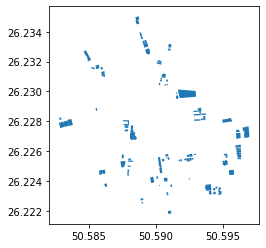

In [25]:
result.plot()

In [26]:
result= result.reset_index()


In [27]:
result = result[result['element_type'] != 'node']
result= result.reset_index()

<Axes: >

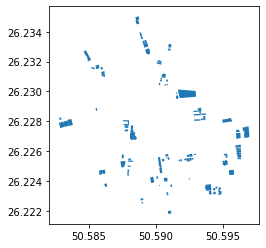

In [28]:
result.plot()

In [29]:
results = result[['element_type', 'geometry']]

In [30]:
results.to_file(r'Downloads\bahrainFlood_1200.json')

In [66]:
results

,element_type,geometry
0,way,"POLYGON ((151.22368 -33.86715, 151.22389 -33.8..."
1,way,"POLYGON ((151.21776 -33.86853, 151.21764 -33.8..."
2,way,"POLYGON ((151.22167 -33.87092, 151.22139 -33.8..."
3,way,"POLYGON ((151.22166 -33.86611, 151.22187 -33.8..."
4,way,"POLYGON ((151.21942 -33.86902, 151.21965 -33.8..."
...,...,...
453,way,"POLYGON ((151.22558 -33.87731, 151.22571 -33.8..."
454,way,"POLYGON ((151.22635 -33.87713, 151.22640 -33.8..."
455,way,"POLYGON ((151.22678 -33.87709, 151.22673 -33.8..."
456,way,"POLYGON ((151.22510 -33.87689, 151.22522 -33.8..."


In [15]:
result = result[result['element_type'] != 'node']

In [16]:
result

,index,element_type,osmid,highway,geometry,line,name,name:da,name:ru,network,...,name:yi,name:gan,name:lmo,company,centroid,index_right,class,count,drownArea,color
1,26,way,4245075,NaN,"POLYGON ((-0.11410 51.50192, -0.11418 51.50196...",NaN,London Waterloo Station,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,POINT (-0.11362 51.50242),0,1,32827,3282700,#084594
2,28,way,4266524,NaN,"POLYGON ((-0.13953 51.50387, -0.13954 51.50384...",NaN,Lancaster House,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,POINT (-0.13912 51.50382),0,1,32827,3282700,#084594
3,29,way,4266528,NaN,"POLYGON ((-0.13173 51.50599, -0.13196 51.50624...",NaN,Carlton House,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,POINT (-0.13278 51.50576),0,1,32827,3282700,#084594
4,31,way,4372002,NaN,"POLYGON ((-0.12766 51.50935, -0.12769 51.50936...",NaN,National Gallery,NaN,Национальная галерея,NaN,...,NaN,NaN,NaN,NaN,POINT (-0.12883 51.50893),0,1,32827,3282700,#084594
5,32,way,5987419,NaN,"POLYGON ((-0.11754 51.50568, -0.11740 51.50583...",NaN,Royal Festival Hall,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,POINT (-0.11677 51.50578),0,1,32827,3282700,#084594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,2756,way,161420181,NaN,"POLYGON ((-0.11242 51.51344, -0.11241 51.51344...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,POINT (-0.11236 51.51340),1,1,17,1700,#084594
1049,9708,relation,2335557,NaN,"POLYGON ((-0.11424 51.51433, -0.11427 51.51438...",NaN,Royal Courts of Justice,NaN,Королевский судный двор,NaN,...,NaN,NaN,NaN,NaN,POINT (-0.11320 51.51418),1,1,17,1700,#084594
1050,6339,way,475037214,NaN,"POLYGON ((-0.13678 51.50818, -0.13672 51.50811...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,POINT (-0.13670 51.50816),3,1,4,400,#084594
1051,6345,way,475037221,NaN,"POLYGON ((-0.13678 51.50766, -0.13662 51.50772...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,POINT (-0.13661 51.50785),3,1,4,400,#084594


In [17]:
results = result[['element_type', 'geometry', 'color']]

In [11]:
gdf2

,class,count,drownArea,geometry
0,1,27,2700,"POLYGON ((-0.11454 51.51084, -0.11454 51.51075..."
1,1,50,5000,"POLYGON ((-0.11454 51.50634, -0.11454 51.50625..."
2,1,2,200,"POLYGON ((-0.11552 51.51039, -0.11534 51.51039..."
3,1,3,300,"POLYGON ((-0.11597 51.50634, -0.11570 51.50634..."
4,1,3396,339600,"POLYGON ((-0.11804 51.50994, -0.11804 51.50985..."
5,1,40,4000,"POLYGON ((-0.12280 51.50581, -0.12280 51.50572..."
6,1,1,100,"POLYGON ((-0.12343 51.50356, -0.12334 51.50356..."
7,1,14,1400,"POLYGON ((-0.12352 51.50356, -0.12352 51.50347..."
8,1,135,13500,"POLYGON ((-0.12370 51.50239, -0.12370 51.50230..."
9,1,40,4000,"POLYGON ((-0.12451 51.50356, -0.12451 51.50329..."


In [12]:
single_polygon = gdf2['geometry'].unary_union

# Create a new GeoDataFrame with the single polygon
single_polygon_gdf = gpd.GeoDataFrame({'geometry': [single_polygon]}, crs=gdf2.crs)

<Axes: >

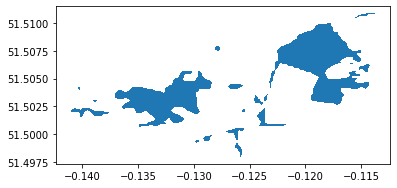

In [14]:
.plot()